### OpenCV in Python

#### import library

In [1]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# imread won't show any error when the image is not found.
img = cv2.imread("some/wrong/path.jpg")

In [3]:
# chech the image exists or not, use img is None will return True when the image is not found.
img = cv2.imread("some/wrong/path.jpg")
if img is None:
    sys.exit("Could not read the image.")

SystemExit: Could not read the image.

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
# image with path 
# /Users/sanit/Downloads/00-puppy.jpg
# C://Users/admin/opencv/00-puppy.jpg'
img = cv2.imread("00-puppy.jpg") 
if img is None:
    sys.exit("Could not read the image.")

In [5]:
img

array([[[78, 81, 95],
        [80, 83, 97],
        [81, 84, 98],
        ...,
        [22, 27, 25],
        [22, 27, 25],
        [22, 27, 25]],

       [[78, 81, 95],
        [79, 82, 96],
        [79, 82, 96],
        ...,
        [22, 27, 25],
        [22, 27, 25],
        [22, 27, 25]],

       [[78, 81, 95],
        [77, 80, 94],
        [77, 80, 94],
        ...,
        [22, 27, 25],
        [22, 27, 25],
        [22, 27, 25]],

       ...,

       [[20, 29, 19],
        [21, 30, 20],
        [21, 30, 20],
        ...,
        [22, 30, 23],
        [23, 31, 24],
        [23, 31, 24]],

       [[21, 30, 20],
        [21, 30, 20],
        [20, 29, 19],
        ...,
        [22, 30, 23],
        [23, 31, 24],
        [23, 31, 24]],

       [[21, 30, 20],
        [20, 29, 19],
        [20, 29, 19],
        ...,
        [22, 30, 23],
        [23, 31, 24],
        [23, 31, 24]]], dtype=uint8)

In [6]:
type(img)

numpy.ndarray

In [7]:
img.shape

(1300, 1950, 3)

### use plt.imshow to display the image 

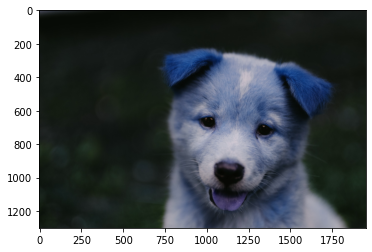

In [8]:
plt.imshow(img)

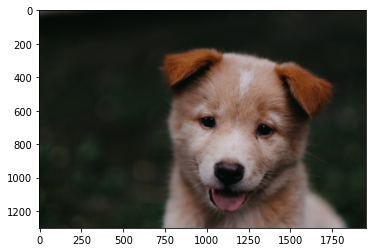

In [9]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### Read an image as gray scale

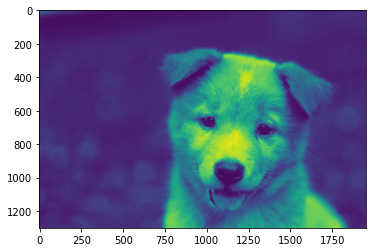

In [10]:
img_gray = cv2.imread('00-puppy.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

In [11]:
img_gray.shape

(1300, 1950)

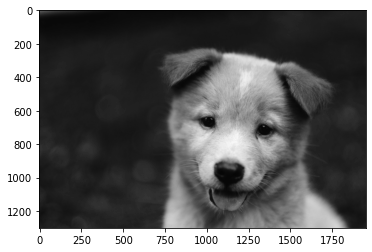

In [12]:
plt.imshow(img_gray,cmap="gray")

### Crop Images

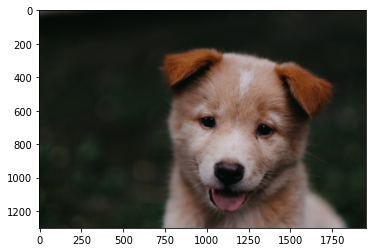

In [69]:
plt.imshow(img_rgb)

In [72]:
y = 220
h = 1000
x = 750
w = 1000

In [77]:
img_crop = img_rgb[y:y+h,x:x+w]
img_crop.shape

(1000, 1000, 3)

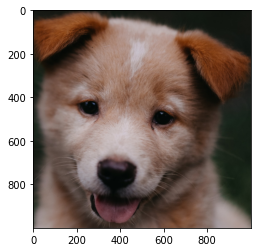

In [79]:
plt.imshow(img_crop)

### Resize Images

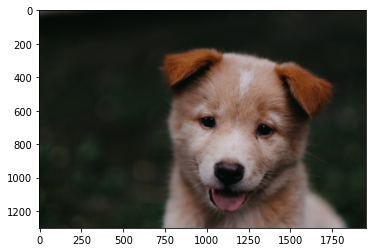

In [14]:
plt.imshow(img_rgb)

In [15]:
img_rgb.shape # (height, width, color channels)

(1300, 1950, 3)

In [16]:
img =cv2.resize(img_rgb,(1300,275)) # (width,height)

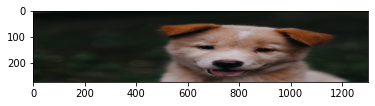

In [17]:
plt.imshow(img)

In [18]:
img.shape

(275, 1300, 3)

### Resize using ratio

In [19]:
w_ratio = 0.5
h_ratio = 0.5

In [31]:
new_img = cv2.resize(img_rgb,(0,0), fx= w_ratio, fy = h_ratio)

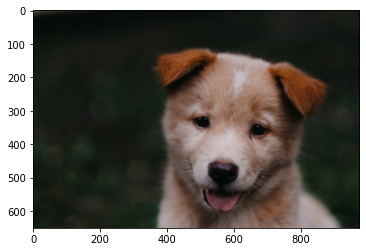

In [32]:
plt.imshow(new_img)

In [33]:
new_img.shape

(650, 975, 3)

### Interpolation

In [34]:
img = cv2.imread("seashell.png")

In [35]:
img.shape

(160, 160, 3)

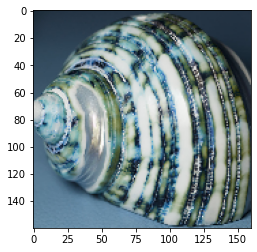

In [36]:
#Origianl Image
plt.imshow(img)

### Scale down an image to (40,40)

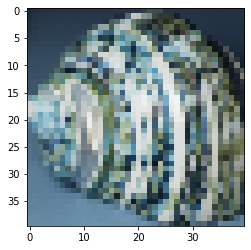

In [37]:
half_img = cv2.resize(img,(40,40))
plt.imshow(half_img)

### Scale up an image from (40,40) to (160,160)

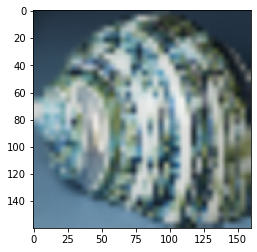

In [39]:
half_up_img = cv2.resize(half_img,(0,0),fx=4,fy=4)
plt.imshow(half_up_img)

### Scale down an image with cv2.INTER_AREA

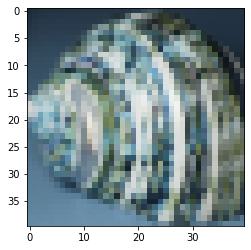

In [40]:
in_half_img = cv2.resize(img,(40,40),interpolation=cv2.INTER_AREA )
plt.imshow(in_half_img)

### Scale up an image with cv2.INTER_CUBIC

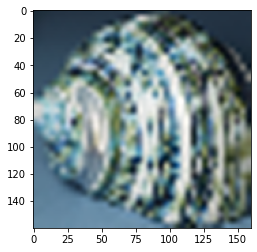

In [41]:
in_half_up_img = cv2.resize(half_img,(0,0),fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
plt.imshow(in_half_up_img)

### Flipping an Image

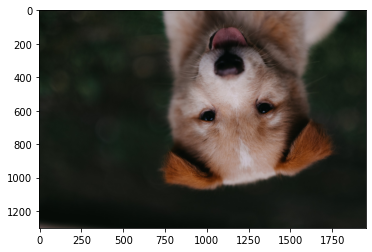

In [42]:
# Along central x axis
new_img = cv2.flip(img_rgb,0)
plt.imshow(new_img)

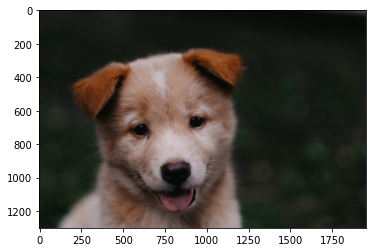

In [43]:
# Along central y axis
new_img = cv2.flip(img_rgb,1)
plt.imshow(new_img)

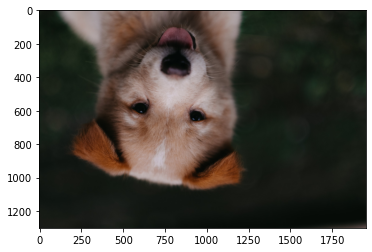

In [44]:
# Along both axes
new_img = cv2.flip(img_rgb,-1)
plt.imshow(new_img)

### Rotate images counter clockwise

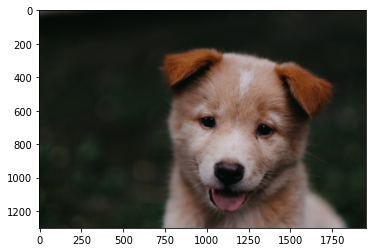

In [57]:
plt.imshow(img_rgb)

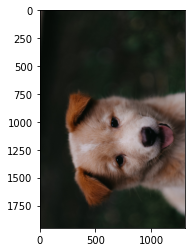

In [49]:
img_ccw = cv2.transpose(img_rgb)
plt.imshow(img_ccw)

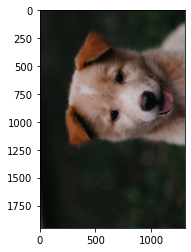

In [50]:
img_ccw = cv2.flip(img_ccw,0)
plt.imshow(img_ccw)

### Rotate images counter clockwise

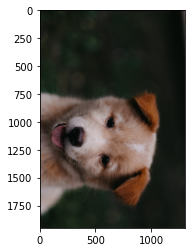

In [52]:
img_cw = cv2.transpose(img_rgb)
img_cw = cv2.flip(img_cw,1)
plt.imshow(img_cw)

### Rotate image with specific degree

In [64]:
import math

def rotation(image, angleInDegrees):
    h, w = image.shape[:2]
    img_c = (w / 2, h / 2)

    rot = cv2.getRotationMatrix2D(img_c, angleInDegrees, 1)

    rad = math.radians(angleInDegrees)
    sin = math.sin(rad)
    cos = math.cos(rad)
    b_w = int((h * abs(sin)) + (w * abs(cos)))
    b_h = int((h * abs(cos)) + (w * abs(sin)))

    rot[0, 2] += ((b_w / 2) - img_c[0])
    rot[1, 2] += ((b_h / 2) - img_c[1])

    outImg = cv2.warpAffine(image, rot, (b_w, b_h), flags=cv2.INTER_LINEAR)
    return outImg

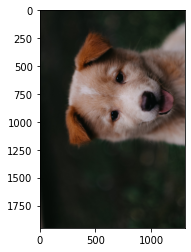

In [65]:
rotated90 = rotation(img_rgb,90)
plt.imshow(rotated90)

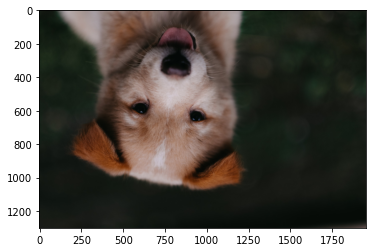

In [66]:
rotated180 = rotation(img_rgb,180)
plt.imshow(rotated180)

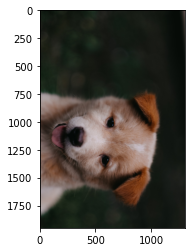

In [67]:
rotated270 = rotation(img_rgb,270)
plt.imshow(rotated270)

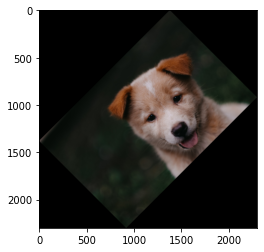

In [68]:
rotated45 = rotation(img_rgb,45)
plt.imshow(rotated45)

### Drawing on images

In [97]:
#create blank image
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)
blank_img.shape

(512, 512, 3)

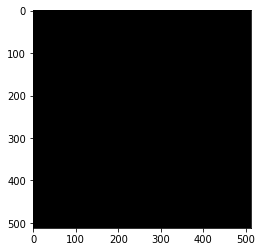

In [99]:
plt.imshow(blank_img)

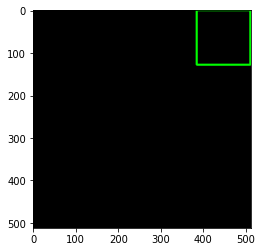

In [100]:
blank_img = cv2.rectangle(blank_img,pt1=(384,0),pt2=(510,128),color=(0,255,0),thickness=3)
plt.imshow(blank_img)

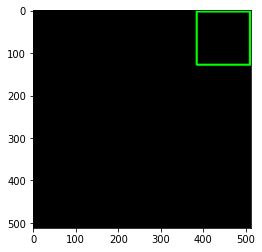

In [101]:
blank_img = cv2.rectangle(blank_img,pt1=(384,3),pt2=(509,128),color=(0,255,0),thickness=3)
plt.imshow(blank_img)

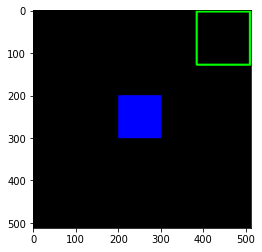

In [102]:
# thickness = -1 to fill the regtangle
blank_img = cv2.rectangle(blank_img,pt1=(200,200),pt2=(300,300),color=(0,0,255),thickness=-1)
plt.imshow(blank_img)

### Circle

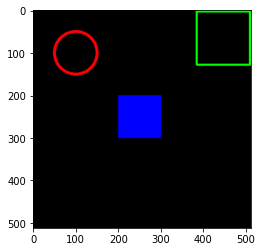

In [103]:
blank_img = cv2.circle(blank_img, center=(100,100), radius=50, color=(255,0,0), thickness=5)
plt.imshow(blank_img)

### Line

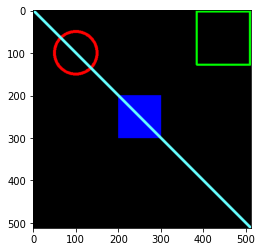

In [104]:
# Draw a diagonal blue line with thickness of 5 px
blank_img = cv2.line(blank_img,pt1=(0,0),pt2=(511,511),color=(102, 255, 255),thickness=5)
plt.imshow(blank_img)

### Text

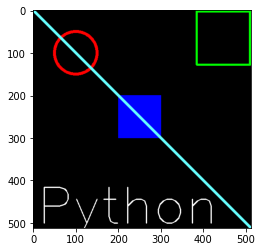

In [106]:
font = cv2.FONT_HERSHEY_SIMPLEX
blank_img = cv2.putText(blank_img,text='Python',org=(10,500), \
                        fontFace=font,fontScale= 4,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(blank_img)

### Polygons
To draw a polygon, first you need coordinates of vertices. Make those points into an array of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32. 

In [107]:
blank_img = np.zeros(shape=(512,512,3),dtype=np.int32)

In [108]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],np.int32)

In [109]:
pts = vertices.reshape((-1,1,2))

In [110]:
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

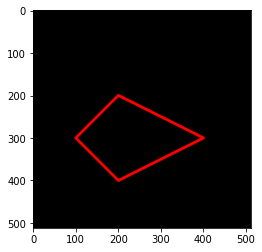

In [111]:
cv2.polylines(blank_img,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(blank_img)

### Save image files

In [112]:
type(rotated45)

numpy.ndarray

In [113]:
cv2.imwrite('my-puppy.jpg',rotated45)

True

Keep in mind, the above stored the BGR version of the image.